In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab
%matplotlib inline

In [42]:
import pandas_datareader.data as web
start = pd.Timestamp('2012-1-1')
end = pd.Timestamp('2014-12-31')
f = web.DataReader("F", 'morningstar', start, end)

In [43]:
f.head()

Close   High    Low   Open    Volume
Symbol Date                                            
F      2012-01-02  10.76  10.76  10.76  10.76         0
       2012-01-03  11.13  11.25  10.99  11.00  45709811
       2012-01-04  11.30  11.53  11.07  11.15  79725188
       2012-01-05  11.59  11.63  11.24  11.33  67877467
       2012-01-06  11.71  11.80  11.52  11.74  59840605

In [47]:
f.reset_index(inplace=True)

In [50]:
del f['Symbol']

In [53]:
f.set_index('Date', inplace=True)

In [54]:
f.head()

,Close,High,Low,Open,Volume
Date,,,,,
2012-01-02,10.76,10.76,10.76,10.76,0
2012-01-03,11.13,11.25,10.99,11.00,45709811
2012-01-04,11.30,11.53,11.07,11.15,79725188
2012-01-05,11.59,11.63,11.24,11.33,67877467
2012-01-06,11.71,11.80,11.52,11.74,59840605


Plot High and Low value from July-202 to Dec-2012

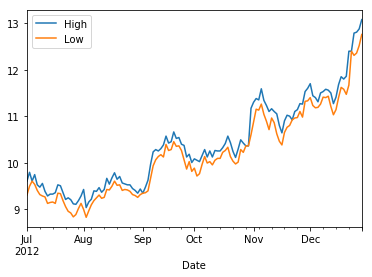

In [55]:
f['2012-7':'2012-12'][['High', 'Low']].plot()

 # Is the variance of the trading volume relatively stable over time?

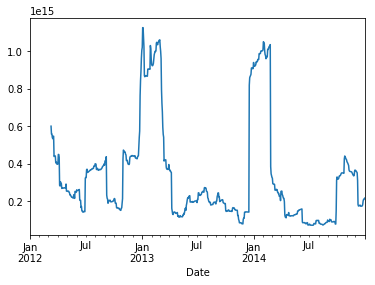

In [56]:
r = f.rolling(50).var()['Volume'].plot()

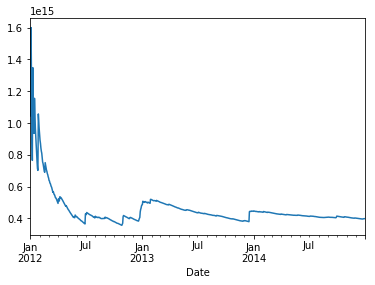

In [57]:
f.expanding().var()['Volume'].plot()

# On how many days did the stock close higher than it opened?

In [61]:
len(f[f['Close'] > f['Open']])

357

# Did the 'up' days become more or less frequent over time?

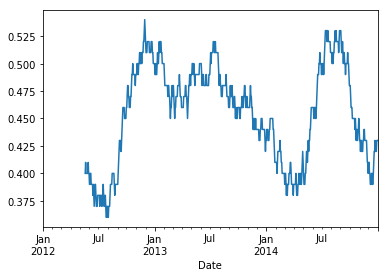

In [63]:
f['Day_Gain'] = f.Close - f.Open
f.rolling(window=100)['Day_Gain'].apply(lambda x: len([x_i for x_i in x if x_i > 0]) / len(x)).plot()

# Compute and plot the mean Monthly High value of stock

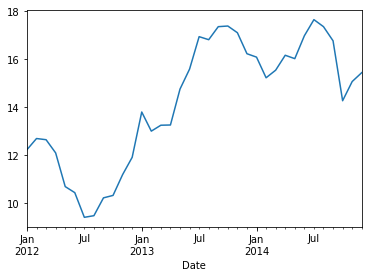

In [70]:
f.resample('M').mean()['High'].plot()

# Variance of the differenced volume

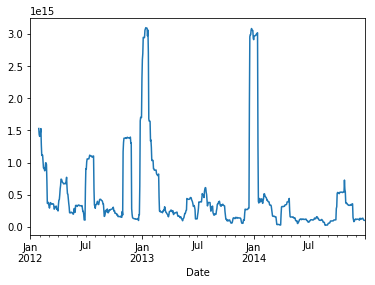

In [72]:
volume = f.Volume
volume_lagged = f.Volume.shift()
diff_volume = volume-volume_lagged
diff_volume.rolling(window=20).var().plot()

# Does the lagged time series correlate with itself?

In [73]:
pd.DataFrame({'real': f.Volume, 'lagged': f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.404499
real,0.404499,1.000000
